# Project 1: Digit Classification with KNN and Naive Bayes

In this project, you'll implement your own image recognition system for classifying digits. Read through the code and the instructions carefully and add your own code where indicated. Each problem can be addressed succinctly with the included packages -- please don't add any more. Grading will be based on writing clean, commented code, along with a few short answers.

As always, you're welcome to work on the project in groups and discuss ideas on the course wall, but <b> please prepare your own write-up (with your own code). </b>

If you're interested, check out these links related to digit recognition:

* Yann Lecun's MNIST benchmarks: http://yann.lecun.com/exdb/mnist/
* Stanford Streetview research and data: http://ufldl.stanford.edu/housenumbers/

Finally, if you'd like to get started with Tensorflow, you can read through this tutorial: https://www.tensorflow.org/tutorials/keras/basic_classification. It uses a dataset called "fashion_mnist", which is identical in structure to the original digit mnist, but uses images of clothing rather than images of digits. The number of training examples and number of labels is the same. In fact, you can simply replace the code that loads "fashion_mnist" with "mnist" and everything should work fine.

In [2]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# Import a bunch of libraries.
import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_openml
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Set the randomizer seed so results are the same each time.
np.random.seed(0)

Load the data. Notice that the data gets partitioned into training, development, and test sets. Also, a small subset of the training data called mini_train_data and mini_train_labels gets defined, which you should use in all the experiments below, unless otherwise noted.

In [53]:
# Load the digit data from https://www.openml.org/d/554 or from default local location '~/scikit_learn_data/...'
X, Y = fetch_openml(name='mnist_784', return_X_y=True, cache=False)


# Rescale grayscale values to [0,1].
X = X / 255.0

# Shuffle the input: create a random permutation of the integers between 0 and the number of data points and apply this
# permutation to X and Y.
# NOTE: Each time you run this cell, you'll re-shuffle the data, resulting in a different ordering.
shuffle = np.random.permutation(np.arange(X.shape[0]))
X, Y = X[shuffle], Y[shuffle]

print('data shape: ', X.shape)
print('label shape:', Y.shape)

# Set some variables to hold test, dev, and training data.
test_data, test_labels = X[61000:], Y[61000:] # 9000 numbers
dev_data, dev_labels = X[60000:61000], Y[60000:61000] # 1000
train_data, train_labels = X[:60000], Y[:60000] # 60000 
mini_train_data, mini_train_labels = X[:1000], Y[:1000] # 1000

('data shape: ', (70000, 784))
('label shape:', (70000,))


### Part 1:

Show a 10x10 grid that visualizes 10 examples of each digit.

Notes:
* You can use `plt.rc()` for setting the colormap, for example to black and white.
* You can use `plt.subplot()` for creating subplots.
* You can use `plt.imshow()` for rendering a matrix.
* You can use `np.array.reshape()` for reshaping a 1D feature vector into a 2D matrix (for rendering).

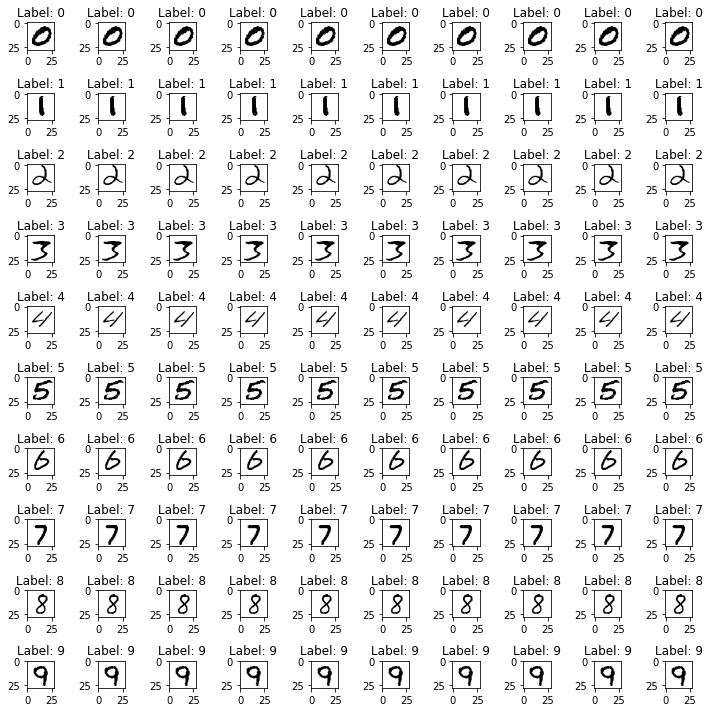

In [151]:
def P1(num_examples=10):

### STUDENT START ###

    images = [] # Array to add ordered examples
    labels = [] # Array to add ordered labels
    digit = 0
    
    # Loop to get as many examples per digit as indicated by num_examples argument
    while(digit < 10):
        i = 0
        c = 0
        while(c < num_examples):
            if int(Y[i]) == digit:
                images.append(X[i])
                labels.append(digit)
                c += 1
            else:
                i += 1
        digit += 1

    num = 10*num_examples
    num_row = 10
    num_col = num_examples
    
    # Loop to print a grid with 10 rows and as many columns as indicated by num_examples argument
    fig, axes = plt.subplots(num_row, num_col, figsize=(10,10))
    for i in range(num):
        ax = axes[i//num_col, i%num_col]
        ax.imshow(images[i].reshape(28,28), cmap='gray_r')
        ax.set_title('Label: {}'.format(labels[i]))
    plt.tight_layout()
    plt.show()

### STUDENT END ###

P1(10)

### Part 2:

Produce k-Nearest-Neighbors model with k = [1,3,5,7,9].  Evaluate and show teh performance of each model. For the 1-Nearest Neighbor model, show precision, recall, and F1 for each label. Which is the most difficult digit?

Notes:
* Train on the mini train set.
* Evaluate performance on the dev set.
* You can use `KNeighborsClassifier` to produce a k-nearest neighbor model.
* You can use `classification_report` to get precision, recall, and F1 results.

In [175]:
def P2(k_values):

### STUDENT START ###
    for value in k_values:
        
        # Train the model and predict results for each of the given values
        model = KNeighborsClassifier(n_neighbors=value)
        model.fit(mini_train_data, mini_train_labels)
        test_predicted_labels = model.predict(dev_data)

        # Manually calculate the accuracy of the model. 
        # This could be done with the sklearn.metrics accuracy_score
        tp = 0
        for i in range(10):
            tp += confusion_matrix(dev_labels, test_predicted_labels)[i,i]
        print("For k = "+ str(value) +", Accuracy = "+ str(tp/1000.0))

        if value is 1:
            
            # Use classification_report to see the model performance for each digit only for k=1
            print("Classification Report for k = 1:")
            print(classification_report(dev_labels, test_predicted_labels))
            
### STUDENT END ###

k_values = [1, 3, 5, 7, 9]
P2(k_values)

For k = 1, Accuracy = 0.877
Classification Report for k = 1:
              precision    recall  f1-score   support

           0       0.92      0.94      0.93       104
           1       0.85      0.97      0.91       114
           2       0.93      0.84      0.88        97
           3       0.88      0.81      0.84       106
           4       0.89      0.87      0.88       100
           5       0.82      0.90      0.86        92
           6       0.95      0.95      0.95        99
           7       0.84      0.87      0.85        97
           8       0.90      0.80      0.85        93
           9       0.81      0.81      0.81        98

   micro avg       0.88      0.88      0.88      1000
   macro avg       0.88      0.88      0.88      1000
weighted avg       0.88      0.88      0.88      1000

For k = 3, Accuracy = 0.874
For k = 5, Accuracy = 0.878
For k = 7, Accuracy = 0.868
For k = 9, Accuracy = 0.861


ANSWER:

Here the performance is compared by calculating the accuracy of each model, and k = 5 was the best performing model. 

For k = 1, 9 is the most difficult digit to predict considering the f1-score. Since I do not have a reason to worry more about either false negatives or false positives, then it seems like f1-score is a good metric to consider. Otherwise, 8 could be considered the most difficult digit if we consider only how many true 8s we were able to predict (recall), and do not worry about how many times we incorrectly predicted 8.  

### Part 3:

Produce 1-Nearest Neighbor models using training data of various sizes.  Evaluate and show the performance of each model.  Additionally, show the time needed to measure the performance of each model.

Notes:
* Train on the train set.
* Evaluate on the dev set.
* You can use `KNeighborsClassifier` to produce a k-nearest neighbor model.
* You can use `time.time()` to measure elapsed time of operations.

In [285]:
def P3(train_sizes, accuracies):

### STUDENT START ###
    for size in train_sizes:

        # Define data and labels for each training set size 
        td = train_data[:size]
        tl = train_labels[:size]
        
        # Create and train a 1-NN model for the set
        model = KNeighborsClassifier(n_neighbors=1)
        model.fit(td, tl)
        
        # Evaluate the model and register how long it takes
        start = time.time()
        
        test_predicted_labels = model.predict(dev_data)
        
        tp = 0
        for i in range(10):
            tp += confusion_matrix(dev_labels, test_predicted_labels)[i,i]
        accuracies.append(tp/1000.0)
        
        end = time.time() 
        
        print("For size = "+ str(size) +", acccuracy = "+ str(tp/1000.0) + 
              ", Time to evaluate model: "+ str(end - start))
        

### STUDENT END ###

train_sizes = [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25600]
accuracies = []
P3(train_sizes, accuracies)

For size = 100, acccuracy = 0.67, Time to evaluate model: 0.136595964432
For size = 200, acccuracy = 0.789, Time to evaluate model: 0.208507061005
For size = 400, acccuracy = 0.832, Time to evaluate model: 0.391376972198
For size = 800, acccuracy = 0.864, Time to evaluate model: 0.718125104904
For size = 1600, acccuracy = 0.902, Time to evaluate model: 1.36122083664
For size = 3200, acccuracy = 0.914, Time to evaluate model: 2.92283797264
For size = 6400, acccuracy = 0.939, Time to evaluate model: 6.06981492043
For size = 12800, acccuracy = 0.955, Time to evaluate model: 14.4328379631
For size = 25600, acccuracy = 0.963, Time to evaluate model: 29.7406919003


### Part 4:

Produce a regression model that predicts accuracy of a 1-Nearest Neighbor model given training set size. Show $R^2$ of the regression model and the accuracies it predicts for training set sizes 60000, 120000, and 1000000.  Show a lineplot of the actual accuracies and predicted accuracies vs. training set size.  What's wrong with using regression here?

Apply some transformation that makes the predictions more reasonable.  Show $R^2$ of the improved regression model and the accuracies it predicts for training set sizes 60000, 120000, and 1000000.  Show a lineplot of the actual accuracies and predicted accuracies vs. training set size.

Notes:
* Train the regression models on all of the (transformed) accuracies estimated in Problem 3.
* Evaluate the regression models on all of the (transformed) accuracies estimated in Problem 3.
* You can use `LinearRegression` to produce a linear regression model.
* Remember that the sklearn `fit()` functions take an input matrix X and output vector Y. So, each input example in X is a vector, even if it contains only a single value.

__________Linear Regression__________
Estimated linear function: y = 0.830307 + 0.000007x
R2 = -0.49691552466787114
Estimated accuracies for training set sizes:
Training set size = 60000, accuracy = [1.24741126]
Training set size = 120000, accuracy = [1.66451513]
Training set size = 1000000, accuracy = [7.78203857]


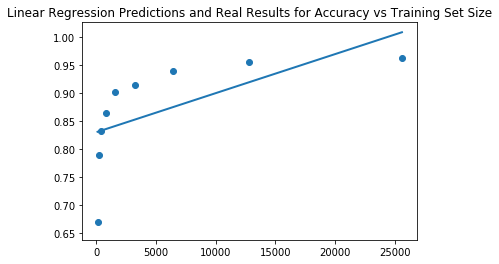

__________Linear Regression with Transformed Data__________
Estimated linear function: y = 0.191315 + -0.000008x
R2 = -0.49707250166826117
Estimated accuracies for training set sizes:
Training set size = 60000, accuracy = [1.34364666]
Training set size = 120000, accuracy = [2.1860344]
Training set size = 1000000, accuracy = [2752.82380195]


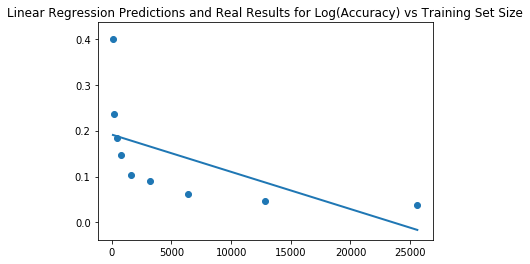

In [281]:
def P4():

### STUDENT START ###
    
    # Reshape P3 accuracies (y) and train sizes (x) to train a linear model
    accuracies_lr = np.array(accuracies).reshape(-1,1)
    train_sizes_lr = np.array(train_sizes).reshape(-1,1)
    
    # Train linear regression model and generate predidctions 
    lr_model = LinearRegression(fit_intercept=True)
    lr_model.fit(train_sizes_lr, accuracies_lr)
    
    train_sizes_pred = np.array([100, 200, 400, 800, 1600, 3200, 6400, 12800, 25600, 60000, 120000, 1000000]).reshape(-1,1)
    accuracies_lr_pred = lr_model.predict(train_sizes_pred)
    
    # Print the function and the R2 score for the model
    print ('__________Linear Regression__________')
    print ('Estimated linear function: y = %.6f + %.6fx' %(lr_model.intercept_[0], lr_model.coef_[0][0]))
    print ('R2 = ' + str(lr_model.score(accuracies_lr, accuracies_lr_pred[:9])))
    print ('Estimated accuracies for training set sizes:')
    print ('Training set size = 60000, accuracy = ' + str(accuracies_lr_pred[9]))
    print ('Training set size = 120000, accuracy = ' + str(accuracies_lr_pred[10]))
    print ('Training set size = 1000000, accuracy = ' + str(accuracies_lr_pred[11]))
    
    # Plot the generated model and the real values of accuracy as scatter points
    plt.scatter(train_sizes, accuracies)
    plt.plot(train_sizes_pred[:9], accuracies_lr_pred[:9])
    plt.title("Linear Regression Predictions and Real Results for Accuracy vs Training Set Size")
    plt.show()
    
    # Transform the data: get the logarithm of the accuracies
    transformed_accurracies = np.array(-np.log(accuracies)).reshape(-1,1)
    
    # Train linear regression model and generate predidctions on transformed data
    lr_model_transformed = LinearRegression(fit_intercept=True)
    lr_model_transformed.fit(train_sizes_lr, transformed_accurracies)
    accuracies_lr_pred_transformed = lr_model_transformed.predict(train_sizes_pred)
    
    # Print the function and the R2 score for the improved model
    print ('__________Linear Regression with Transformed Data__________')
    print ('Estimated linear function: y = %.6f + %.6fx' %(lr_model_transformed.intercept_[0], lr_model_transformed.coef_[0][0]))
    print ('R2 = ' + str(lr_model_transformed.score(transformed_accurracies, accuracies_lr_pred_transformed[:9])))  
    print ('Estimated accuracies for training set sizes:')
    print ('Training set size = 60000, accuracy = ' + str(np.exp(-accuracies_lr_pred_transformed[9])))
    print ('Training set size = 120000, accuracy = ' + str(np.exp(-accuracies_lr_pred_transformed[10])))
    print ('Training set size = 1000000, accuracy = ' + str(np.exp(-accuracies_lr_pred_transformed[11])))
    
    # Plot the generated model and the real values of accuracy as scatter points
    plt.scatter(train_sizes, -np.log(accuracies))
    plt.plot(train_sizes_pred[:9], accuracies_lr_pred_transformed[:9])
    plt.title("Linear Regression Predictions and Real Results for Log(Accuracy) vs Training Set Size")
    plt.show()
    
    
### STUDENT END ###

P4()

ANSWER:

What's wrong with using regression here? 

The relationship between accuracy and the size of the trainning set is non-linear, so the generated model doesn't really represent the available data. In addition, by using linear regression we have the possibility of getting values for accuracy higher than 1, which is not really possible in practice. To get a better model, we need to transform the data. Since we can not add new libraries to try a polynomial regression, for example, we can try a logarithmic transformation. 



### Part 5:

Produce a 1-Nearest Neighbor model and show the confusion matrix. Which pair of digits does the model confuse most often? Show the images of these most often confused digits.

Notes:
- Train on the mini train set.
- Evaluate performance on the dev set.
- You can use `confusion_matrix()` to produce a confusion matrix.

Confusion Matrix:
[[ 98   0   0   0   0   3   2   0   1   0]
 [  0 111   0   0   1   0   1   1   0   0]
 [  2   6  81   2   0   1   1   2   1   1]
 [  0   2   3  86   0   6   0   3   3   3]
 [  0   3   0   0  87   0   0   1   0   9]
 [  2   0   0   2   1  83   1   2   1   0]
 [  1   2   0   0   0   1  94   0   1   0]
 [  2   4   0   1   3   0   0  84   0   3]
 [  0   2   2   4   0   7   0   1  74   3]
 [  2   0   1   3   6   0   0   6   1  79]]
Examples of confusing 4s:


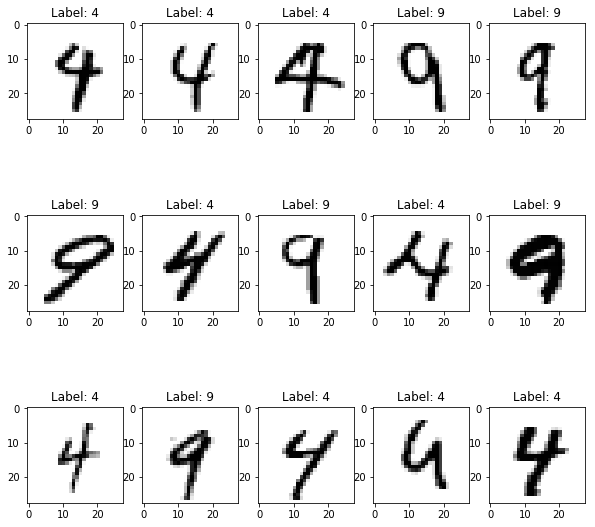

In [311]:
def P5():
    
### STUDENT START ###

    # Create, train and evaluate the model
    model = KNeighborsClassifier(n_neighbors=1)
    model.fit(mini_train_data, mini_train_labels)
    test_predicted_labels = model.predict(dev_data)
    
    # Produce and print the confusion matrix
    cm = confusion_matrix(dev_labels, test_predicted_labels)
    print("Confusion Matrix:")
    print(cm)
    print("Examples of confusing 4s:")
    
    # Find examples of 4s predicted as 9s and 9s predicted as 4s
    examples = []
    example_labels = []
    for i in range(1000):
        if dev_labels[i] == '4' and test_predicted_labels[i] == '9':
            examples.append(dev_data[i])
            example_labels.append(dev_labels[i])
        elif dev_labels[i] == '9' and test_predicted_labels[i] == '4':
            examples.append(dev_data[i])
            example_labels.append(dev_labels[i])
            
    # plot images
    fig, axes = plt.subplots(3, 5, figsize=(10,10))
    for i in range(15):
        ax = axes[i//5, i%5]
        ax.imshow(examples[i].reshape(28,28), cmap='gray_r')
        ax.set_title('Label: {}'.format(example_labels[i]))
    plt.show()
    
### STUDENT END ###

P5()

ANSWER: 

Which pair of digits does the model confuse most often? 

The model confuses 4s with 9s and viceversa the most. We can see that because in the confusion matrix the highest number that is not in the diagonal is in position [5,10], followed by [10,5], which corresponds to actual 4s predicted as 9s. Examples of these are shown above.

### Part 6:

A common image processing technique is to smooth an image by blurring. The idea is that the value of a particular pixel is estimated as the weighted combination of the original value and the values around it. Typically, the blurring is Gaussian, i.e., the weight of a pixel's influence is determined by a Gaussian function over the distance to the relevant pixel.

Implement a simplified Gaussian blur by just using the 8 neighboring pixels like this: the smoothed value of a pixel is a weighted combination of the original value and the 8 neighboring values.

Apply your blur filter in 3 ways:
- Filter the training data but not the dev data
- Filter the dev data but not the training data
- Filter both training data and dev data

Show the accuracy resulting no filter and from each way you apply the filter.

Notes:
* Train on the (filtered) mini train set.
* Evaluate performance on the (filtered) dev set.
* There are Guassian blur filters available, for example in `scipy.ndimage.filters`. You are welcome to experiment with those, but you are likely to get the best results with the simplified version described above.

Baseline accurracy = 0.884
Blurred train data accurracy = 0.675
Blurred dev data accurracy = 0.675
Blurred dev and train data accurracy = 0.892

Example of original image


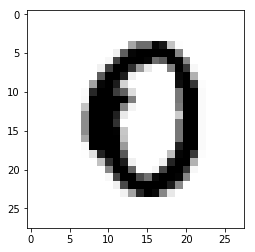

Example of blurred image


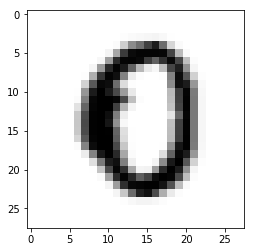

In [45]:
def P6():
    
### STUDENT START ###

# Here we applying a filter using a Gaussian Kernel of 3x3 size. I am defining a standard deviation of 0.3, 
# therefore the weights for each pixel and its 8 neighbours will be:
# 0.002284 0.043222 0.002284
# 0.043222 0.817974 0.043222
# 0.002284 0.043222 0.002284
# This values are gotten by integrating the Gaussian function dividing it in discrete sections. This process is not 
# trivial but it is wildy used in pre existing filter, so it's not reproduced here for simplicity. 
# An example of Gaussian Kernel Calculator
# can be found here: http://dev.theomader.com/gaussian-kernel-calculator/

    # Create a filter function to recalculate the value of each pixel as a weighted average of its own value and its 8 neighbours. 
    # For simplicity, it was assume that all margine pixel values was 0 and the average were not calculated. 
    def blurring(original):
        blurred = np.array([[0.0]*28]*28)
        original_shaped = original.reshape(28,28)
        for i in range(1,27,1):
            for j in range(1,27,1):
                blurred_value = (0.002284*original_shaped[i-1,j-1] + 0.043222*original_shaped[i,j-1] + 0.002284*original_shaped[i+1,j-1]
                            + 0.043222*original_shaped[i-1,j] + 0.817974*original_shaped[i,j] + 0.043222*original_shaped[i+1,j]
                            + 0.043222*original_shaped[i-1,j+1] + 0.817974*original_shaped[i,j+1] + 0.043222*original_shaped[i+1,j+1])
                blurred[i][j] = blurred_value
        return blurred.reshape(1,784)[0]

    # Create small function to calculate accuracy using the confusion matrix
    def mnist_accuracy(real_labels, predicted_labels):
        tp = 0
        for i in range(10):
            tp += confusion_matrix(real_labels, predicted_labels)[i,i] 
        accuracy = tp/1000.0
        return accuracy

    # Calculated the blurred versions of mini_train_data and dev_data
    blurred_mini_train = []
    blurred_dev = []

    for image in mini_train_data:
        blurred_mini_train.append(blurring(image))

    for image in dev_data:
        blurred_dev.append(blurring(image))

    # Define the baseline: Make a model and evaluate it without the filter 
    baseline_model = KNeighborsClassifier(n_neighbors=1)
    baseline_model.fit(mini_train_data, mini_train_labels)
    test_predicted_labels = baseline_model.predict(dev_data)
    print("Baseline accurracy = " + str(mnist_accuracy(dev_labels, test_predicted_labels)))

    # Case 1: Filter the training data but not the dev data 
    blurred_train_model = KNeighborsClassifier(n_neighbors=1)
    blurred_train_model.fit(blurred_mini_train, mini_train_labels)
    blurred_train_predicted_labels = blurred_train_model.predict(dev_data)
    print("Blurred train data accurracy = " + str(mnist_accuracy(dev_labels, blurred_train_predicted_labels)))

    # Case 2: Filter the dev data but not the train data 
    blurred_dev_model = KNeighborsClassifier(n_neighbors=1)
    blurred_dev_model.fit(mini_train_data, mini_train_labels)
    blurred_dev_predicted_labels = blurred_dev_model.predict(blurred_dev)
    print("Blurred dev data accurracy = " + str(mnist_accuracy(dev_labels, blurred_train_predicted_labels)))

    # Case 3: Filter both data sets
    blurred_both_model = KNeighborsClassifier(n_neighbors=1)
    blurred_both_model.fit(blurred_mini_train, mini_train_labels)
    blurred_both_predicted_labels = blurred_both_model.predict(blurred_dev)
    print("Blurred dev and train data accurracy = " + str(mnist_accuracy(dev_labels, blurred_both_predicted_labels))+ "\n")


    # print(blurred_mini_train == mini_train_data)
    # print(blurred_dev == dev_data)
    # print(blurred_mini_train[0])
    # print(mini_train_data[0])
    # print(blurred_dev[0])
    # print(dev_data[0])

    print("Example of original image")
    fig = plt.figure
    plt.imshow(mini_train_data[0].reshape(28,28), cmap='gray_r')
    plt.show()

    print("Example of blurred image")
    fig = plt.figure
    plt.imshow(blurred_mini_train[0].reshape(28,28), cmap='gray_r')
    plt.show()

### STUDENT END ###


P6()

### Part 7:

Produce two Naive Bayes models and evaluate their performances.  Recall that Naive Bayes estimates P(feature|label), where each label is a categorical, not a real number.

For the first model, map pixel values to either 0 or 1, representing white or black - you should pre-process the data or use `BernoulliNB`'s `binarize` parameter.  Use some reasonable threshold to separate white from black.  Use `BernoulliNB` to produce the model.

For the second model, map pixel values to either 0, 1, or 2, representing white, gray, or black - you should pre-process the data.  Use some reasonable thresholds to separate white from gray from black.  Use `MultinomialNB` to produce the model. 

Show the Bernoulli model accuracy and the Multinomial model accuracy.

Notes:
* Train on the mini train set.
* Evaluate performance on the dev set.
* `sklearn`'s Naive Bayes methods can handle real numbers, but for this exercise explicitly do the mapping to categoricals. 

Does the multinomial version improve the results? Why or why not?

In [90]:
def P7():

    ### STUDENT START ###

    # Bernoulli Model

    # Define a function to binarize the train data and generate the training set for the Bernoulli Model
    def manual_binarize(original):
        binary_image = []
        for i in range(len(original)):
            if original[i] > 0.5:
                binary_image.append(1)
            else:
                binary_image.append(0)
        return binary_image

    binary_train_data = map(manual_binarize, mini_train_data)
    binary_dev_data = map(manual_binarize, dev_data)

    # Create and train the Bernuoulli Model, then make predictions and evaluate
    bernoulli_model = BernoulliNB()
    bernoulli_model.fit(binary_train_data, mini_train_labels)
    bernoulli_predictions = bernoulli_model.predict(binary_dev_data)
    print("Bernoulli Model Accuracy: " + str(bernoulli_model.score(binary_dev_data, dev_labels)))

    # Multinominal Model

    # Define a function to classify train data and generate the training set for the Multinominal Model
    def manual_multi(original):
        multi_image = []
        for i in range(len(original)):
            if original[i] > 0.66:
                multi_image.append(2)
            elif original[i] > 0.33 and original[i] < 0.66:
                multi_image.append(1)
            else:
                multi_image.append(0)
        return multi_image

    multi_train_data = map(manual_binarize, mini_train_data)
    multi_dev_data = map(manual_binarize, dev_data)

    # Create and train the Multinominal Model, then make predictions and evaluate
    multi_model = MultinomialNB()
    multi_model.fit(binary_train_data, mini_train_labels)
    multi_predictions = multi_model.predict(binary_dev_data)
    print("Multinominal Model Accuracy: " + str(multi_model.score(multi_dev_data, dev_labels)))

    ### STUDENT END ###

P7()

Bernoulli Model Accuracy: 0.819
Multinominal Model Accuracy: 0.788


ANSWER:

Does the multinomial version improve the results? Why or why not?

In this case the multinomial version does not improve the results. By having binary values the conditional probabilities of a pixel having x value given a digit are higher, which makes it easier to predict the correct label. 

### Part 8:

Search across several values for the LaPlace smoothing parameter (alpha) to find its effect on a Bernoulli Naive Bayes model's performance.  Show the accuracy at each alpha value.

Notes:
* Train on the mini train set.
* Vary alpha and evaulate performance using `GridSearchCV` to cross-validate.
* Cross-validation is based on partitions of the training data, so results will be a bit different than if you used the dev set to evaluate performance.

What is the best value for alpha? What is the accuracy when alpha is near 0? Is this what you'd expect?

In [107]:
def P8(alphas):

### STUDENT START ###

    # First, we use GridSearchCV to evaluate each value of alpha
    model = BernoulliNB()
    grid = GridSearchCV(estimator=model, param_grid=alphas)
    grid.fit(binary_train_data, mini_train_labels)
    
    print("The best value of alpha after cross-validation is " + str(grid.best_params_)) 
    print("The scores of all alpha values were: ")
    
    for i in range(len(alphas['alpha'])):
        print("alpha = " + str(alphas['alpha'][i]) + ", accuracy = "+ str(grid.cv_results_['mean_test_score'][i]))
        
    return grid


### STUDENT END ###

alphas = {'alpha': [1.0e-10, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]}
nb = P8(alphas)
print("Best alpha = ", nb.best_params_)

The best value of alpha after cross-validation is {'alpha': 0.01}
The scores of the rest of the alpha values were: 
alpha = 1e-10, accuracy = 0.804
alpha = 0.0001, accuracy = 0.822
alpha = 0.001, accuracy = 0.822
alpha = 0.01, accuracy = 0.823
alpha = 0.1, accuracy = 0.821
alpha = 0.5, accuracy = 0.816
alpha = 1.0, accuracy = 0.813
alpha = 2.0, accuracy = 0.803
alpha = 10.0, accuracy = 0.736
('Best alpha = ', {'alpha': 0.01})


ANSWER:

In this case the best value of alpha is 0.01. When alpha gets closer to zero from this point, the accurracy starts to diminish, diverging in the accuracy that the model would have without smoothing, which is an expected behaviour. 

### Part 9:

Produce a model using Guassian Naive Bayes, which is intended for real-valued features, and evaluate performance. You will notice that it does not work so well. Diagnose the problem and apply a simple fix so that the model accuracy is around the same as for a Bernoulli Naive Bayes model. Show the model accuracy before your fix and the model accuracy after your fix.  Explain your solution.

Notes:
* Train on the mini train set.
* Evaluate performance on the dev set.
* Consider the effects of theta and sigma.  These are stored in the model's `theta_` and `sigma_` attributes.

In [132]:
def P9():

### STUDENT END ###
    
    # Create and train the Gaussian NB model
    gaussian_model = GaussianNB()
    gaussian_model.fit(mini_train_data, mini_train_labels)
    # Evaluate the model and print results
    print("Accuracy = " + str(gaussian_model.score(dev_data, dev_labels)) + " for the Gaussian model.")
    
    print(gaussian_model.sigma_[0])
              
#     # Create and train a new Gaussian NB model with a different variance and mean for the only available feature
#     gaussian_model = GaussianNB()
#     gaussian_model.fit(mini_train_data, mini_train_labels)
#     # Evaluate the model and print results
#     print("Accuracy = " + str(gaussian_model.score(dev_data, dev_labels)) + " for the Gaussian model.")
    
    return gaussian_model.score(dev_data, dev_labels)

### STUDENT END ###

P9()

Accuracy = 0.543 for the Gaussian model.
[1.97230601e-10 1.97230601e-10 1.97230601e-10 1.97230601e-10
 1.97230601e-10 1.97230601e-10 1.97230601e-10 1.97230601e-10
 1.97230601e-10 1.97230601e-10 1.97230601e-10 1.97230601e-10
 1.97230601e-10 1.97230601e-10 1.97230601e-10 1.97230601e-10
 1.97230601e-10 1.97230601e-10 1.97230601e-10 1.97230601e-10
 1.97230601e-10 1.97230601e-10 1.97230601e-10 1.97230601e-10
 1.97230601e-10 1.97230601e-10 1.97230601e-10 1.97230601e-10
 1.97230601e-10 1.97230601e-10 1.97230601e-10 1.97230601e-10
 1.97230601e-10 1.97230601e-10 1.97230601e-10 1.97230601e-10
 1.97230601e-10 1.97230601e-10 1.97230601e-10 1.97230601e-10
 1.97230601e-10 1.97230601e-10 1.97230601e-10 1.97230601e-10
 1.97230601e-10 1.97230601e-10 1.97230601e-10 1.97230601e-10
 1.97230601e-10 1.97230601e-10 1.97230601e-10 1.97230601e-10
 1.97230601e-10 1.97230601e-10 1.97230601e-10 1.97230601e-10
 1.97230601e-10 1.97230601e-10 1.97230601e-10 1.97230601e-10
 1.97230601e-10 1.97230601e-10 1.97230601e-1

0.543

ANSWER:

### Part 10:

Because Naive Bayes produces a generative model, you can use it to generate digit images.

Produce a Bernoulli Naive Bayes model and then use it to generate a 10x20 grid with 20 example images of each digit. Each pixel output should be either 0 or 1, based on comparing some randomly generated number to the estimated probability of the pixel being either 0 or 1.  Show the grid.

Notes:
* You can use np.random.rand() to generate random numbers from a uniform distribution.
* The estimated probability of each pixel being 0 or 1 is stored in the model's `feature_log_prob_` attribute. You can use `np.exp()` to convert a log probability back to a probability.

How do the generated digit images compare to the training digit images?

In [0]:
#def P10(num_examples):

### STUDENT START ###


### STUDENT END ###

#P10(20)

ANSWER:

### Part 11:

Recall that a strongly calibrated classifier is rougly 90% accurate when the posterior probability of the predicted class is 0.9. A weakly calibrated classifier is more accurate when the posterior probability of the predicted class is 90% than when it is 80%. A poorly calibrated classifier has no positive correlation between posterior probability and accuracy.  

Produce a Bernoulli Naive Bayes model.  Evaluate performance: partition the dev set into several buckets based on the posterior probabilities of the predicted classes - think of a bin in a histogram- and then estimate the accuracy for each bucket. So, for each prediction, find the bucket to which the maximum posterior probability belongs, and update "correct" and "total" counters accordingly.  Show the accuracy for each bucket.

Notes:
* Train on the mini train set.
* Evaluate perfromance on the dev set.
* Apply a reasonable Laplace smoothing (alpha) value.

How would you characterize the calibration for this Bernoulli Naive Bayes model?

In [0]:
#def P11(buckets, correct, total):
    
### STUDENT START ###


                
### STUDENT END ###

# buckets = [0.5, 0.9, 0.999, 0.99999, 0.9999999, 0.999999999, 0.99999999999, 0.9999999999999, 1.0]
# correct = [0 for i in buckets]
# total = [0 for i in buckets]

# P11(buckets, correct, total)

# for i in range(len(buckets)):
#     accuracy = 0.0
#     if (total[i] > 0): accuracy = correct[i] / total[i]
#     print('p(pred) is %.13f to %.13f    total = %3d    accuracy = %.3f' % (0 if i==0 else buckets[i-1], buckets[i], total[i], accuracy))

ANSWER:

### Part 12 EXTRA CREDIT:

Design new features to see if you can produce a Bernoulli Naive Bayes model with better performance.  Show the accuracy of a model based on the original features and the accuracy of the model based on the new features.

Here are a few ideas to get you started:
- Try summing or averaging the pixel values in each row.
- Try summing or averaging the pixel values in each column.
- Try summing or averaging the pixel values in each square block. (pick various block sizes)
- Try counting the number of enclosed regions. (8 usually has 2 enclosed regions, 9 usually has 1, and 7 usually has 0)

Notes:
* Train on the mini train set (enhanced to comprise the new features).
* Evaulate performance on the dev set.
* Ensure that your code is well commented.

In [0]:
#def P12():

### STUDENT START ###


### STUDENT END ###

#P12()